# Assignment - Advanced Regression



A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The data is provided in the csv file below.
The company is looking at prospective properties to buy to enter the market.
You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:
Which variables are significant in predicting the price of a house
How well those variables describe the price of a house

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

## DATA UNDERSTANDING AND EXPLORATION

In [2]:
train=pd.read_csv(r"C:\Users\Ankita Rath\Downloads\train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 81)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## DATA CLEANING

In [6]:
#Missing data treatment
total_missing_values = train.isnull().sum().sort_values(ascending=False)
percentage_missing_data = (100*(train.isnull().sum()/train.isnull().count())).sort_values(ascending=False)
missing_data = pd.concat([total_missing_values, percentage_missing_data], axis=1, keys=['total_missing_values','percentage_missing_data'])
missing_data.head(20)

,total_missing_values,percentage_missing_data
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [7]:
train = train.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


'PoolQC','MiscFeature','Alley','Fence have high NA values. So dropping it.

In [8]:
# all numeric (float and int) variables in the dataset
train_numeric = train.select_dtypes(include=['float64', 'int64'])
train_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

Here, although some variables are numeric (int), we'd rather treat them as categorical since they have discrete values.

### Lot frontage

In [10]:
train['LotFrontage'].replace({np.nan:'0'},inplace=True)

### Garage

In [11]:
train['GarageType'].replace({np.nan:'0'},inplace=True)
train['GarageFinish'].replace({np.nan:'0'},inplace=True)
train['GarageQual'].replace({np.nan:'0'},inplace=True)
train['GarageCond'].replace({np.nan:'0'},inplace=True)


### Observing Missing values

In [12]:
#Missing data treatment
total_missing_values = train.isnull().sum().sort_values(ascending=False)
percentage_missing_data = (100*(train.isnull().sum()/train.isnull().count())).sort_values(ascending=False)
missing_data = pd.concat([total_missing_values, percentage_missing_data], axis=1, keys=['total_missing_values','percentage_missing_data'])
missing_data.head(20)

,total_missing_values,percentage_missing_data
FireplaceQu,690,47.260274
GarageYrBlt,81,5.547945
BsmtFinType2,38,2.602740
BsmtExposure,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247
MasVnrArea,8,0.547945
MasVnrType,8,0.547945
Electrical,1,0.068493


### Basement

In [13]:
train['BsmtQual'].replace({np.nan:'No Basement'},inplace=True)
print(100*(train['BsmtQual'].value_counts()/train['BsmtQual'].count()))
# Three levels can be combined as "Others" (Fa, No BAsement, Ex)
train['BsmtQual'].replace({'Fa':'Others'},inplace=True)
train['BsmtQual'].replace({'Ex':'Others'},inplace=True)
train['BsmtQual'].replace({'No Basement':'Others'},inplace=True)
print(100*(train['BsmtQual'].value_counts()/train['BsmtQual'].count()))# 'GarageYrBlt' is same as 'YearBuilt' so we can drop it
train=train.drop(['GarageYrBlt'],axis=1)

TA             44.452055
Gd             42.328767
Ex              8.287671
No Basement     2.534247
Fa              2.397260
Name: BsmtQual, dtype: float64
TA        44.452055
Gd        42.328767
Others    13.219178
Name: BsmtQual, dtype: float64


In [14]:
# Cleaning up variable BsmtCond (Replacing NA => No Basement)
train['BsmtCond'].replace({np.nan:'No Basement'},inplace=True)
100*(train['BsmtCond'].value_counts()/train['BsmtCond'].count())
# Three levels of fair/good quality can be combined as OK 
train['BsmtCond'].replace({'Fa':'OK'},inplace=True)
train['BsmtCond'].replace({'TA':'OK'},inplace=True)
train['BsmtCond'].replace({'Gd':'OK'},inplace=True)
# Two levels of poor quality can be combined as NOK (Po, No Basement)
train['BsmtCond'].replace({'Po':'NOK'},inplace=True)
train['BsmtCond'].replace({'No Basement':'NOK'},inplace=True)
print(100*(train['BsmtCond'].value_counts()/train['BsmtCond'].count()))

OK     97.328767
NOK     2.671233
Name: BsmtCond, dtype: float64


In [15]:
#Cleaning up variable BsmtExposure (Replacing NA => No Basement)
train['BsmtExposure'].replace({np.nan:'No Basement'},inplace=True)
100*(train['BsmtExposure'].value_counts()/train['BsmtExposure'].count())

No             65.273973
Av             15.136986
Gd              9.178082
Mn              7.808219
No Basement     2.602740
Name: BsmtExposure, dtype: float64

In [16]:
#Cleaning up variable BsmtFinType1 (Replacing NA => No Basemen
train['BsmtFinType1'].replace({np.nan:'No Basement'},inplace=True)
100*(train['BsmtFinType1'].value_counts()/train['BsmtFinType1'].count())

Unf            29.452055
GLQ            28.630137
ALQ            15.068493
BLQ            10.136986
Rec             9.109589
LwQ             5.068493
No Basement     2.534247
Name: BsmtFinType1, dtype: float64

In [17]:
train=train.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)
train=train.drop(['BsmtFinType1','BsmtFinType2'],axis=1)

### Fireplace

In [18]:
#Cleaning up variable FireplaceQu (Replacing NA => No Fireplace)
train['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)
print(100*(train['FireplaceQu'].value_counts()/train['FireplaceQu'].count()))
#Imputing level values of FireplaceQu
train['FireplaceQu'].replace({'Fa':'OK Fireplace'},inplace=True)
train['FireplaceQu'].replace({'TA':'OK Fireplace'},inplace=True)
train['FireplaceQu'].replace({'Gd':'OK Fireplace'},inplace=True)
train['FireplaceQu'].replace({'Ex':'OK Fireplace'},inplace=True)
train['FireplaceQu'].replace({'Po':'OK Fireplace'},inplace=True)
print(100*(train['FireplaceQu'].value_counts()/train['FireplaceQu'].count()))

No Fireplace    47.260274
Gd              26.027397
TA              21.438356
Fa               2.260274
Ex               1.643836
Po               1.369863
Name: FireplaceQu, dtype: float64
OK Fireplace    52.739726
No Fireplace    47.260274
Name: FireplaceQu, dtype: float64


### Garage

In [19]:
#Cleaning up variable GarageType (Replacing NA => No Garage)
train['GarageType'].replace({np.nan:'No Garage'},inplace=True)
100*(train['GarageType'].value_counts()/train['GarageType'].count())

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
0           5.547945
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [20]:
#Cleaning up variable GarageFinish (Replacing NA => No Garage)
train['GarageFinish'].replace({np.nan:'No Garage'},inplace=True)
100*(train['GarageFinish'].value_counts()/train['GarageFinish'].count())

Unf    41.438356
RFn    28.904110
Fin    24.109589
0       5.547945
Name: GarageFinish, dtype: float64

### Electrical

In [21]:
#Cleaning up variable MiscFeature (Replacing NA => No Fence)
train['Electrical'].replace({np.nan:'None'},inplace=True)
100*(train['Electrical'].value_counts()/train['Electrical'].count())

SBrkr    91.369863
FuseA     6.438356
FuseF     1.849315
FuseP     0.205479
Mix       0.068493
None      0.068493
Name: Electrical, dtype: float64

In [22]:
train=train.drop(['MasVnrArea','LotFrontage'],axis=1)

In [23]:
#Missing data treatment
total_missing_values = train.isnull().sum().sort_values(ascending=False)
percentage_missing_data = (100*(train.isnull().sum()/train.isnull().count())).sort_values(ascending=False)
missing_data = pd.concat([total_missing_values, percentage_missing_data], axis=1, keys=['total_missing_values','percentage_missing_data'])
missing_data.head(20)

,total_missing_values,percentage_missing_data
MasVnrType,8,0.547945
SalePrice,0,0.000000
ExterQual,0,0.000000
YearRemodAdd,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
ExterCond,0,0.000000
CentralAir,0,0.000000


In [24]:
# correlation matrix
corr = train_numeric.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


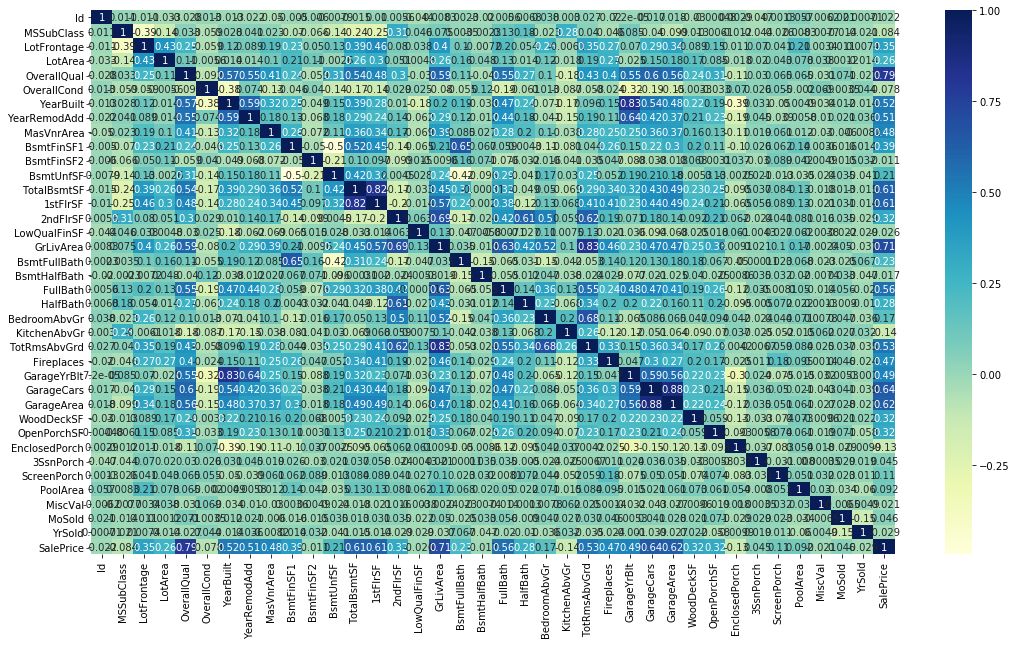

In [25]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()


In [26]:
# variable formats
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 69 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-

In [27]:
# percentage of missing values in each column
round(train.isnull().sum()/len(train.index), 2)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       1.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
                ... 
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond   

In [28]:
#converting year to number of years
# train['YearBuilt'] = 2019 - train['YearBuilt']
# train['YearRemodAdd'] = 2019 - train['YearRemodAdd']
# train['YrSold'] = 2019 - train['YrSold']
# bins=[1872,1950,1976,1991,2001,2010]
# slot_names=['1872-1950','1950-1975','1976-1990','1991-2000','2001-2010']
# train['YearBuilt']=pd.cut(train['YearBuilt'],bins,labels=slot_names,include_lowest=True)

In [29]:
train.shape

(1460, 69)

## Univariate Analysis

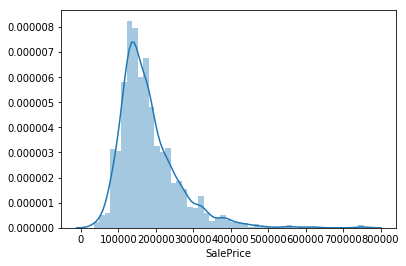

In [30]:
#Target variable- sale price of house
sns.distplot(train['SalePrice'])
plt.show()

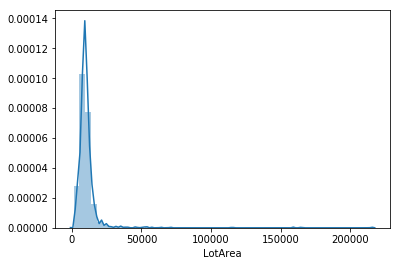

In [31]:
# Predictor variable- LotArea 
sns.distplot(train['LotArea'])
plt.show()

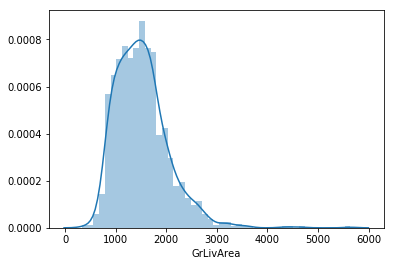

In [32]:
# Predictor variable- GrLivArea
sns.distplot(train['GrLivArea'])
plt.show()

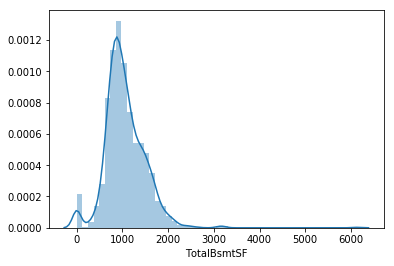

In [33]:
# Predictor variable- TotalBsmtSF
sns.distplot(train['TotalBsmtSF'])
plt.show()

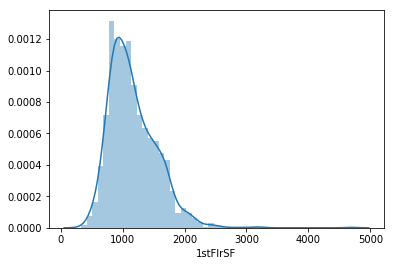

In [34]:
# Predictor variable- 1stFlrSF
sns.distplot(train['1stFlrSF'])
plt.show()

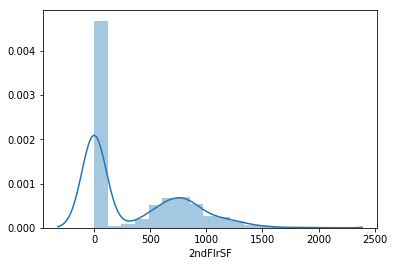

In [35]:
# Predictor variable- 2ndFlrSF
sns.distplot(train['2ndFlrSF'])
plt.show() 

In [36]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
 

### Start of Regression 

In [37]:
# split into X and y
X = train.loc[:, ['MSSubClass','MSZoning','LotArea','Street','LotShape','LandContour','Utilities',
                    'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual',
                    'OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
                    'ExterQual','ExterCond','Foundation','BsmtQual','BsmtExposure','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical',
                    '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                    'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu',
                    'GarageType','GarageFinish','GarageCars','GarageArea','GarageCond','PavedDrive',
                    'WoodDeckSF','OpenPorchSF','EnclosedPorch','PoolArea',
                    'MiscVal','MoSold','YrSold','SaleType','SaleCondition']]

y = train['SalePrice']

### Dummy variables

In [38]:
# Creating dummy variables

housning_df_categorical = X.select_dtypes(include=['object'])
housning_df_dummies = pd.get_dummies(housning_df_categorical, drop_first=True)
housning_df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
# Droping categorical variables 
X = X.drop(list(housning_df_categorical.columns), axis=1)

# Concat dummy variables with X
X = pd.concat([X, housning_df_dummies], axis=1)


In [40]:
X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
X.shape

(1460, 212)

In [42]:
# scaling the features
from sklearn.preprocessing import scale
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=212)

### LINEAR REGRESSION

In [43]:
# Spliting into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [44]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 179),
 ('LotArea', False, 41),
 ('OverallQual', True, 1),
 ('OverallCond', False, 35),
 ('YearBuilt', False, 29),
 ('YearRemodAdd', False, 60),
 ('TotalBsmtSF', False, 37),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 4),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 40),
 ('BsmtHalfBath', False, 122),
 ('FullBath', False, 174),
 ('HalfBath', False, 82),
 ('BedroomAbvGr', False, 44),
 ('KitchenAbvGr', False, 32),
 ('TotRmsAbvGrd', False, 98),
 ('Fireplaces', False, 61),
 ('GarageCars', False, 34),
 ('GarageArea', False, 58),
 ('WoodDeckSF', False, 135),
 ('OpenPorchSF', False, 136),
 ('EnclosedPorch', False, 111),
 ('PoolArea', False, 43),
 ('MiscVal', False, 153),
 ('MoSold', False, 140),
 ('YrSold', False, 138),
 ('MSZoning_FV', False, 65),
 ('MSZoning_RH', False, 66),
 ('MSZoning_RL', False, 63),
 ('MSZoning_RM', False, 64),
 ('Street_Pave', False, 55),
 ('LotShape_IR2', False, 184),
 ('LotShape_IR3', False, 149),
 ('LotShape_Re

In [46]:
X_train.columns[rfe.support_]

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'Condition2_PosN',
       'RoofMatl_WdShngl', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageFinish_Fin', 'SaleType_New'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=202)

In [48]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,OverallQual,1stFlrSF,2ndFlrSF,GrLivArea,Condition2_PosN,RoofMatl_WdShngl,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,SaleType_New
210,-0.795151,-0.772733,-0.795163,-1.240174,-0.037037,-0.064238,-0.818829,0.993174,-0.56364,-0.301962
318,0.651479,0.541779,2.124318,2.152171,-0.037037,-0.064238,1.221257,-1.006873,-0.56364,-0.301962
239,-0.071836,-0.943516,0.783740,-0.054186,-0.037037,-0.064238,-0.818829,0.993174,-0.56364,-0.301962
986,-0.071836,-0.418229,0.657703,0.227558,-0.037037,-0.064238,1.221257,-1.006873,-0.56364,-0.301962
1416,-1.518467,0.215738,1.597253,1.474464,-0.037037,-0.064238,-0.818829,0.993174,-0.56364,-0.301962


In [49]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,OverallQual,1stFlrSF,2ndFlrSF,GrLivArea,Condition2_PosN,RoofMatl_WdShngl,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,SaleType_New
210,-0.795151,-0.772733,-0.795163,-1.240174,-0.037037,-0.064238,-0.818829,0.993174,-0.56364,-0.301962
318,0.651479,0.541779,2.124318,2.152171,-0.037037,-0.064238,1.221257,-1.006873,-0.56364,-0.301962
239,-0.071836,-0.943516,0.783740,-0.054186,-0.037037,-0.064238,-0.818829,0.993174,-0.56364,-0.301962
986,-0.071836,-0.418229,0.657703,0.227558,-0.037037,-0.064238,1.221257,-1.006873,-0.56364,-0.301962
1416,-1.518467,0.215738,1.597253,1.474464,-0.037037,-0.064238,-0.818829,0.993174,-0.56364,-0.301962


# MODEL BUILDING -1

In [50]:
# add a constant
X_train_rfe_lm = sm.add_constant(X_train_rfe)
# create a fitted model in one line
lm_1 = sm.OLS(list(y_train),X_train_rfe_lm).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     366.3
Date:                Wed, 09 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:28:54   Log-Likelihood:                -12181.
No. Observations:                1021   AIC:                         2.438e+04
Df Residuals:                    1010   BIC:                         2.444e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.804e+05   1157.268  

In [51]:
#  Calculate VIF
# vif = pd.DataFrame()
# vif['Features'] = X_train_rfe_lm.columns
# vif['VIF'] = [variance_inflation_factor(X_train_rfe_lm.values, i) for i in range(X_train_rfe_lm.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif


#  Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_lm.values, i) for i in range(X_train_rfe_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,GrLivArea,124.10
3,2ndFlrSF,85.80
2,1stFlrSF,71.52
8,KitchenQual_TA,4.23
7,KitchenQual_Gd,3.45
1,OverallQual,2.16
9,GarageFinish_Fin,1.21
10,SaleType_New,1.18
5,Condition2_PosN,1.05
6,RoofMatl_WdShngl,1.02


In [52]:
X = X_train_rfe.drop(["GrLivArea"], axis = 1,inplace = True)

# MODEL BUILDING - 2

In [53]:
# add a constant
X_train_rfe_lm = sm.add_constant(X_train_rfe)
# create a fitted model in one line
lm_2 = sm.OLS(list(y_train),X_train_rfe_lm).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     404.9
Date:                Wed, 09 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:28:55   Log-Likelihood:                -12184.
No. Observations:                1021   AIC:                         2.439e+04
Df Residuals:                    1011   BIC:                         2.444e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.804e+05   1159.478  

In [54]:
#  Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_lm.values, i) for i in range(X_train_rfe_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,KitchenQual_TA,4.21
6,KitchenQual_Gd,3.42
1,OverallQual,2.16
2,1stFlrSF,1.62
3,2ndFlrSF,1.33
8,GarageFinish_Fin,1.21
9,SaleType_New,1.18
4,Condition2_PosN,1.05
5,RoofMatl_WdShngl,1.02
0,const,1.00


In [ ]:
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(X_train[X_train_rfe_lm],X_train['SalePrice'])

# RESIDUAL ANALYSIS

In [55]:
lm = sm.OLS(list(y_train),X_train_rfe_lm).fit()
y_train_price = lm_2.predict(X_train_rfe_lm)

Text(0.5, 0, 'Errors')

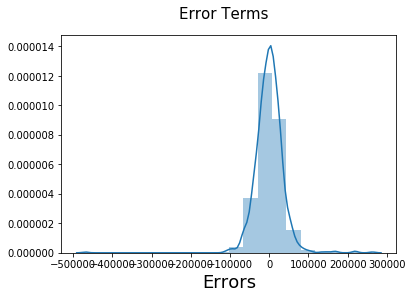

In [56]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Error terms are normally distributed


### Making Predictions Using the Final Model


In [57]:
# Droping const
X_train_rfe_lm = X_train_rfe_lm.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe_lm.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [58]:
# Making predictions using the last model

y_pred = lm.predict(X_test_new)

In [59]:
r2_score(y_test, y_pred)

0.7419950095789181

Text(0, 0.5, 'y_pred')

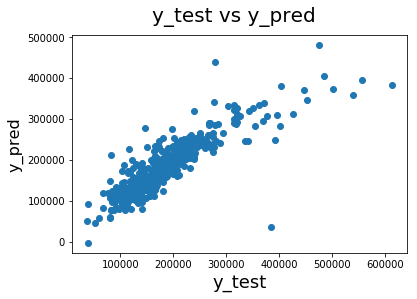

In [60]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [61]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     404.9
Date:                Wed, 09 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:28:59   Log-Likelihood:                -12184.
No. Observations:                1021   AIC:                         2.439e+04
Df Residuals:                    1011   BIC:                         2.444e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.804e+05   1159.478  

## RIDGE AND LASSO

### Lasso

In [62]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Cross Validation
folds = 5

lasso = Lasso()

model_CV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_CV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   31.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [85]:
cv_results = pd.DataFrame(model_CV.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.128099,0.232845,0.0,0.0,0.0001,{'alpha': 0.0001},-17832.433439,-20728.045683,-21010.055311,-20757.537383,...,-19731.300140,1359.279962,27,-12626.620102,-12264.147343,-12680.445214,-13026.071269,-12561.108335,-12631.678453,244.134691
1,0.006250,0.007654,0.0,0.0,0.001,{'alpha': 0.001},-17832.323864,-20727.856957,-21009.964924,-20756.933519,...,-19731.047342,1359.230720,26,-12626.618652,-12264.154994,-12680.400667,-13026.029206,-12561.101264,-12631.660957,244.117432
2,0.012497,0.006249,0.0,0.0,0.01,{'alpha': 0.01},-17831.229341,-20725.986678,-21009.061111,-20750.903028,...,-19728.524816,1358.742830,25,-12626.604109,-12264.229437,-12679.955633,-13025.609090,-12561.030487,-12631.485751,243.945695
3,0.006248,0.007653,0.0,0.0,0.05,{'alpha': 0.05},-17826.391478,-20718.026672,-21005.046956,-20724.626509,...,-19717.499068,1356.722066,24,-12626.538556,-12264.517569,-12678.144278,-13023.753069,-12560.725369,-12630.735768,243.205677
4,0.009375,0.007655,0.0,0.0,0.1,{'alpha': 0.1},-17820.404474,-20708.797693,-21000.037983,-20693.292259,...,-19704.187303,1354.561729,23,-12626.752092,-12264.790526,-12675.920521,-13021.507938,-12560.353602,-12629.864936,242.332911


In [64]:
#lets find out the R-squared value of the lasso model
model_CV1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_CV1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   27.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [65]:
# cv results
cv_results1 = pd.DataFrame(model_CV1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.268675,4.463353e-02,0.003124,0.006249,0.0001,{'alpha': 0.0001},0.868112,0.609427,0.711780,0.381616,...,0.689118,0.183059,28,0.949637,0.945285,0.947609,0.946947,0.947375,0.947371,0.001394
1,0.228070,3.774979e-02,0.000000,0.000000,0.001,{'alpha': 0.001},0.868112,0.609436,0.711796,0.381614,...,0.689123,0.183059,27,0.949637,0.945285,0.947609,0.946947,0.947375,0.947371,0.001394
2,0.206201,1.168933e-02,0.000000,0.000000,0.01,{'alpha': 0.01},0.868114,0.609523,0.711949,0.381600,...,0.689168,0.183060,26,0.949637,0.945285,0.947609,0.946947,0.947375,0.947371,0.001394
3,0.243693,1.593042e-02,0.003124,0.006247,0.05,{'alpha': 0.05},0.868121,0.609911,0.712627,0.381534,...,0.689368,0.183066,25,0.949637,0.945285,0.947609,0.946947,0.947375,0.947371,0.001394
4,0.209327,2.118946e-02,0.003124,0.006248,0.1,{'alpha': 0.1},0.868130,0.610394,0.713143,0.381440,...,0.689551,0.183071,24,0.949637,0.945285,0.947609,0.946947,0.947375,0.947371,0.001394
5,0.206201,6.246758e-03,0.003124,0.006249,0.2,{'alpha': 0.2},0.868147,0.611357,0.713179,0.381216,...,0.689716,0.183075,23,0.949637,0.945285,0.947609,0.946947,0.947375,0.947371,0.001394
6,0.203077,9.879554e-03,0.003125,0.006249,0.3,{'alpha': 0.3},0.868166,0.612315,0.713215,0.381057,...,0.689895,0.183059,22,0.949637,0.945285,0.947609,0.946947,0.947375,0.947371,0.001395
7,0.206201,1.530614e-02,0.006249,0.007653,0.4,{'alpha': 0.4},0.868185,0.613268,0.713251,0.381186,...,0.690129,0.182947,21,0.949637,0.945285,0.947609,0.946947,0.947375,0.947370,0.001395
8,0.199953,6.249046e-03,0.003125,0.006249,0.5,{'alpha': 0.5},0.868203,0.614216,0.713287,0.381313,...,0.690362,0.182837,20,0.949637,0.945284,0.947609,0.946947,0.947374,0.947370,0.001395
9,0.206201,1.169008e-02,0.000000,0.000000,0.6,{'alpha': 0.6},0.868221,0.615158,0.713323,0.381442,...,0.690594,0.182727,19,0.949637,0.945284,0.947609,0.946947,0.947374,0.947370,0.001395


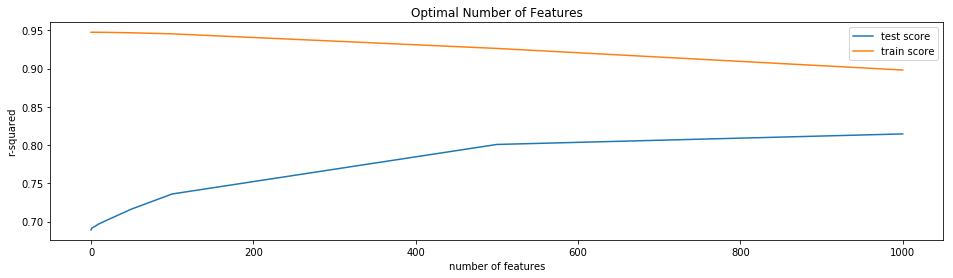

In [66]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [67]:
#checking the value of optimum number of parameters
print(model_CV.best_params_)
print(model_CV.best_score_)

{'alpha': 500}
-18245.76057651623


In [68]:
alpha =100

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
#Extracting the coefficients and model equation from lasso regression
lasso.coef_

array([-3.63889800e+03,  5.44083160e+03,  9.62365185e+03,  6.44382410e+03,
        1.27382236e+04,  2.37374852e+03,  1.20052389e+04,  0.00000000e+00,
        8.61799487e+03, -2.29034680e+03,  3.13658417e+04,  5.00833767e+03,
        4.75381873e+02,  8.22426463e+02, -1.08769746e+03, -3.61826182e+03,
       -3.13928934e+03, -9.41364076e+02,  1.56727450e+03,  3.58207143e+03,
        1.80136682e+03,  7.26048946e+02,  8.00573070e+02, -5.36136384e+02,
        3.11541971e+03,  2.45779453e+02, -6.49322709e+02, -5.36861799e+02,
        8.61923714e+02,  1.57191307e+02,  1.43202571e+03,  0.00000000e+00,
        1.98546628e+03, -0.00000000e+00, -3.54024098e+00,  1.45588608e+02,
        6.06357886e+02, -3.15067907e+02,  1.39034093e+03, -0.00000000e+00,
        2.02517849e+03, -9.91839278e+02, -9.50403289e+01,  0.00000000e+00,
        6.04968404e+02, -1.63617465e+03,  0.00000000e+00,  8.71578967e+02,
        1.26771648e+03, -7.57691753e+01,  3.42624758e+02,  5.11765587e+03,
       -1.54254985e+03, -

In [70]:
# lasso model parameters generation
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 1) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180290.3),
 ('MSSubClass', -3638.9),
 ('LotArea', 5440.8),
 ('OverallQual', 9623.7),
 ('OverallCond', 6443.8),
 ('YearBuilt', 12738.2),
 ('YearRemodAdd', 2373.7),
 ('TotalBsmtSF', 12005.2),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 8618.0),
 ('LowQualFinSF', -2290.3),
 ('GrLivArea', 31365.8),
 ('BsmtFullBath', 5008.3),
 ('BsmtHalfBath', 475.4),
 ('FullBath', 822.4),
 ('HalfBath', -1087.7),
 ('BedroomAbvGr', -3618.3),
 ('KitchenAbvGr', -3139.3),
 ('TotRmsAbvGrd', -941.4),
 ('Fireplaces', 1567.3),
 ('GarageCars', 3582.1),
 ('GarageArea', 1801.4),
 ('WoodDeckSF', 726.0),
 ('OpenPorchSF', 800.6),
 ('EnclosedPorch', -536.1),
 ('PoolArea', 3115.4),
 ('MiscVal', 245.8),
 ('MoSold', -649.3),
 ('YrSold', -536.9),
 ('MSZoning_FV', 861.9),
 ('MSZoning_RH', 157.2),
 ('MSZoning_RL', 1432.0),
 ('MSZoning_RM', 0.0),
 ('Street_Pave', 1985.5),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', -3.5),
 ('LotShape_Reg', 145.6),
 ('LandContour_HLS', 606.4),
 ('LandContour_Low', -315.1),
 ('LandContour_Lvl',

In [71]:
# model with optimal alpha
# lasso regression
lm1 = Lasso(alpha=100)
#lm1 = Lasso(alpha=0.001)
lm1.fit(X_train, y_train)

# predict
y_train_pred = lm1.predict(X_train)
#print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm1.predict(X_test)
#print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

#New Code for R2
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score = {}".format(r_square_score))

R Square score = 0.8314392165225584


From the R square value we see that the model built using lasso regression can have 83% accuracy in its prediction capability. R-squared (R2) explains the proportion of variation in the outcome (Sale Price) that is explained by the predictor variables.

In [72]:
#AIC and BIC Calculation

n= 1016 
k= 100 
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:475124392513.532
AIC:20482.625279254713
BIC:20974.988142068556


### Ridge Regression


Based on the predictor variables having high coefficients in Lasso Regression model, we will shortlist these and perform Ridge regression to further regularize the regression model

In [73]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_CV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_CV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [74]:
cv_results = pd.DataFrame(model_CV.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.128099,0.232845,0.0,0.0,0.0001,{'alpha': 0.0001},-17832.433439,-20728.045683,-21010.055311,-20757.537383,...,-19731.300140,1359.279962,27,-12626.620102,-12264.147343,-12680.445214,-13026.071269,-12561.108335,-12631.678453,244.134691
1,0.006250,0.007654,0.0,0.0,0.001,{'alpha': 0.001},-17832.323864,-20727.856957,-21009.964924,-20756.933519,...,-19731.047342,1359.230720,26,-12626.618652,-12264.154994,-12680.400667,-13026.029206,-12561.101264,-12631.660957,244.117432
2,0.012497,0.006249,0.0,0.0,0.01,{'alpha': 0.01},-17831.229341,-20725.986678,-21009.061111,-20750.903028,...,-19728.524816,1358.742830,25,-12626.604109,-12264.229437,-12679.955633,-13025.609090,-12561.030487,-12631.485751,243.945695
3,0.006248,0.007653,0.0,0.0,0.05,{'alpha': 0.05},-17826.391478,-20718.026672,-21005.046956,-20724.626509,...,-19717.499068,1356.722066,24,-12626.538556,-12264.517569,-12678.144278,-13023.753069,-12560.725369,-12630.735768,243.205677
4,0.009375,0.007655,0.0,0.0,0.1,{'alpha': 0.1},-17820.404474,-20708.797693,-21000.037983,-20693.292259,...,-19704.187303,1354.561729,23,-12626.752092,-12264.790526,-12675.920521,-13021.507938,-12560.353602,-12629.864936,242.332911


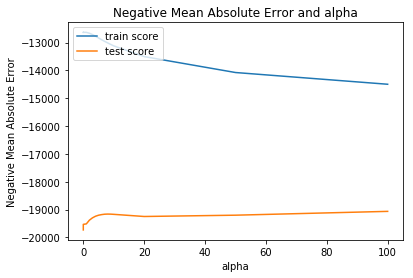

In [75]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [76]:
model_CV.best_params_

{'alpha': 100}

In [77]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#Predictor Variables from the Model built using Ridge Regression:
ridge.coef_

array([-2.47084012e+03,  5.68164701e+03,  1.06229581e+04,  5.56402135e+03,
        9.54445124e+03,  2.43358151e+03,  8.24528185e+03,  7.02324442e+03,
        1.80256063e+04, -9.50284653e+02,  2.00532398e+04,  5.39495852e+03,
        9.59661646e+02,  2.02164702e+03, -7.89843456e+02, -2.69274648e+03,
       -2.49402015e+03, -9.58766202e+02,  1.72580555e+03,  6.32871532e+03,
        6.80440005e+01,  8.58171655e+02,  6.34812527e+02, -3.64516941e+02,
        1.48444192e+03,  3.10182580e+02, -6.06969223e+02, -7.93841341e+02,
        3.49928597e+03,  1.63320200e+03,  6.68728765e+03,  4.56319205e+03,
        1.95670166e+03,  1.06005625e+02, -1.25955202e+03,  3.94562526e+02,
        1.44162038e+03,  3.46727233e+02,  2.74166478e+03, -1.25349634e+02,
        2.42785293e+03, -1.37613748e+03, -3.24484231e+02,  2.59397236e+00,
        9.70978431e+02, -1.65231612e+03,  1.77144662e+02,  1.22881793e+03,
        1.13524289e+03, -1.97818485e+02,  7.79418910e+02,  5.27718157e+03,
       -2.12630148e+03, -

In [78]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', 180293.391),
 ('MSSubClass', -2470.84),
 ('LotArea', 5681.647),
 ('OverallQual', 10622.958),
 ('OverallCond', 5564.021),
 ('YearBuilt', 9544.451),
 ('YearRemodAdd', 2433.582),
 ('TotalBsmtSF', 8245.282),
 ('1stFlrSF', 7023.244),
 ('2ndFlrSF', 18025.606),
 ('LowQualFinSF', -950.285),
 ('GrLivArea', 20053.24),
 ('BsmtFullBath', 5394.959),
 ('BsmtHalfBath', 959.662),
 ('FullBath', 2021.647),
 ('HalfBath', -789.843),
 ('BedroomAbvGr', -2692.746),
 ('KitchenAbvGr', -2494.02),
 ('TotRmsAbvGrd', -958.766),
 ('Fireplaces', 1725.806),
 ('GarageCars', 6328.715),
 ('GarageArea', 68.044),
 ('WoodDeckSF', 858.172),
 ('OpenPorchSF', 634.813),
 ('EnclosedPorch', -364.517),
 ('PoolArea', 1484.442),
 ('MiscVal', 310.183),
 ('MoSold', -606.969),
 ('YrSold', -793.841),
 ('MSZoning_FV', 3499.286),
 ('MSZoning_RH', 1633.202),
 ('MSZoning_RL', 6687.288),
 ('MSZoning_RM', 4563.192),
 ('Street_Pave', 1956.702),
 ('LotShape_IR2', 106.006),
 ('LotShape_IR3', -1259.552),
 ('LotShape_Reg', 394.563),

In [79]:
# model with optimal alpha
# Ridge regression
lm2 = Ridge(alpha=10)
#lm2 = Ridge(alpha=0.001)
lm2.fit(X_train, y_train)

from sklearn.metrics import r2_score
# predict
y_train_pred = lm2.predict(X_train)
#print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm2.predict(X_test)
#print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

#New Code for R2
r_square_score=r2_score(y_test,y_test_pred)
print("R Square score = {}".format(r_square_score))

R Square score = 0.8375445225084337


In [80]:
#AIC and BIC Calculation
n= 1016 
k= 50
resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
print("RSS:{}".format(rss))
aic=n*np.log(rss/n)+2*k
print("AIC:{}".format(aic))
bic=n*np.log(rss/n)+k*np.log(n)
print("BIC:{}".format(bic))

RSS:457915290029.5222
AIC:20345.142562261004
BIC:20591.323993667924


In [81]:
features = pd.Series(dict(zip(X_train.columns,lasso.coef_)))


In [82]:
top_features = np.abs(features).sort_values(ascending = False)[:30].index

In [83]:
features = features[top_features]

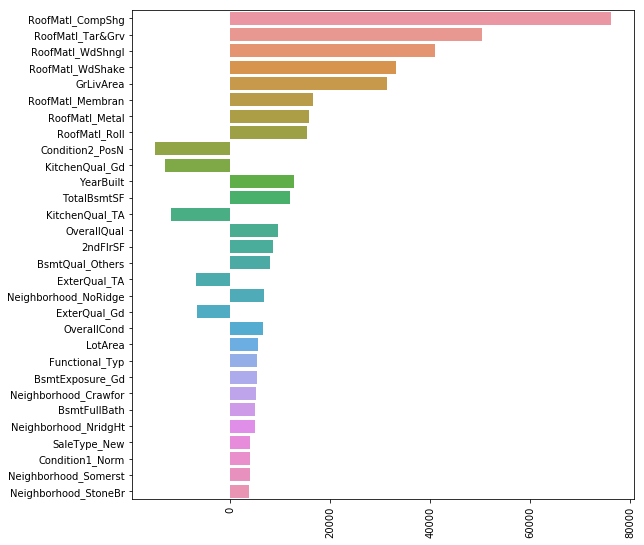

In [84]:
plt.figure(figsize=(9,9))
sns.barplot(y = features.index, x = features.values)
plt.xticks(rotation = 90);

Lasso is better than both Linear and Ridge. It selects only few features while reduces other features to zero and this property is known as feature selection, which is absent in ridge.
RoofMatl_compshg influences the most while predicting the sales price.